# Random Forest on Customer Churn Data

### Introduction

Random forest is a commonly-used machine learning algorithm trademarked by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.

Random Forest is one of the most popular and commonly used algorithms by Data Scientists. Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

### Random Forest Algorithm 

The random forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees. Feature randomness, also known as feature bagging or “the random subspace method” generates a random subset of features, which ensures low correlation among decision trees. This is a key difference between decision trees and random forests. While decision trees consider all the possible feature splits, random forests only select a subset of those features.

Random forest algorithms have three main hyperparameters, which need to be set before training. These include node size, the number of trees, and the number of features sampled. From there, the random forest classifier can be used to solve for regression or classification problems.

<img src= "https://miro.medium.com/v2/resize:fit:1400/1*jE1Cb1Dc_p9WEOPMkC95WQ.png" width=450 height=250/>

### Steps Involved in Random Forest Algorithm

- **Step 1:** In the Random forest model, a subset of data points and a subset of features is selected for constructing each decision tree. Simply put, n random records and m features are taken from the data set having k number of records.

- **Step 2:** Individual decision trees are constructed for each sample.

- **Step 3:** Each decision tree will generate an output.

- **Step 4:** Final output is considered based on Majority Voting or Averaging for Classification and regression, respectively.

### Hyperparameters

Hyper parameters help us to have a certain degree of control over the model to ensure better efficiency, some of the commonly tuned hyperparameters are below.
- **N_estimators** - This parameter helps us to determine the number of Trees in the Forest, higher the number, we create a more robust aggregate model, but that would cost more computational power.
- **max_depth** -  This parameter restricts the number of levels of each tree. Creating more levels increases the possibility of considering more features in each tree. A deep tree would create an overfit model, but in Random forest this would be overcome as we would ensemble at the end.
- **max_features** -This parameter helps us restrict the maximum number of features to be considered at every tree. This is one of the vital parameters in deciding the efficiency. Generally, a Grid search with CV would be performed with various values for this parameter to arrive at the ideal value.
- **bootstrap** - This would help us decide the method used for sampling data points, should it be with or without replacement.
- **max_samples** – This decides the percentage of data that should be used from the training data for training. This parameter is generally not touched, as the samples that are not used for training (out of bag data) can be used for evaluating the forest and it is preferred to use the entire training data set for training the forest

### Advantages and Disadvantages

**Advantages of Random Forest:**
- It reduces overfitting in decision trees and helps to improve the accuracy
- It is flexible to both classification and regression problems
- It works well with both categorical and continuous values
- It automates missing values present in the data
- Normalising of data is not required as it uses a rule-based approach.

**Disadvantages of Random Forest:**
- It requires much computational power as well as resources as it builds numerous trees to combine their outputs. 
- It also requires much time for training as it combines a lot of decision trees to determine the class.
- Due to the ensemble of decision trees, it also suffers interpretability and fails to determine the significance of each variable.

### Objective

##### Predict the churn rate based on behaviour  of customers for a  telecom dataset using Random Forest Algorithm

####  Data Information

The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription, will be used to develop predictive models

In [1]:
# Importing Models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn import metrics
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score
import joblib

In [2]:
# Loading the dataset
df = pd.read_csv("C:/Users/Prath/OneDrive/Documents/Datasets/telecom_churn.csv")

### 1. Data Exploration

In [3]:
df.head().style.background_gradient(cmap="Blues",axis=None)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.500000,97,31.370000,351.600000,80,29.890000,215.800000,90,9.710000,8.700000,4,2.350000,1,False
1,IN,65,415,No,No,0,129.100000,137,21.950000,228.500000,83,19.420000,208.800000,111,9.400000,12.700000,6,3.430000,4,True
2,NY,161,415,No,No,0,332.900000,67,56.590000,317.800000,97,27.010000,160.600000,128,7.230000,5.400000,9,1.460000,4,True
3,SC,111,415,No,No,0,110.400000,103,18.770000,137.300000,102,11.670000,189.600000,105,8.530000,7.700000,6,2.080000,2,False
4,HI,49,510,No,No,0,119.300000,117,20.280000,215.100000,109,18.280000,178.700000,90,8.040000,11.100000,1,3.000000,1,False


In [4]:
df.shape

(667, 20)

In [5]:
# Check for missing values
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [6]:
# Summary statistics
df.describe().style.background_gradient(cmap="Blues",axis=None)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [7]:
# Check data types
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

### 2. Data Preprocessing

In [8]:
# Identify categorical columns in the dataset
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [9]:
encoder = OneHotEncoder(sparse=False, drop='first')  # Use drop='first' to avoid multicollinearity
encoded_cols = encoder.fit_transform(df[categorical_cols])

In [10]:
# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names(categorical_cols))

C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)
df.head().style.background_gradient(cmap="Blues",axis=None)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,117,408,0,184.500000,97,31.370000,351.600000,80,29.890000,215.800000,90,9.710000,8.700000,4,2.350000,1,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,65,415,0,129.100000,137,21.950000,228.500000,83,19.420000,208.800000,111,9.400000,12.700000,6,3.430000,4,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,161,415,0,332.900000,67,56.590000,317.800000,97,27.010000,160.600000,128,7.230000,5.400000,9,1.460000,4,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,111,415,0,110.400000,103,18.770000,137.300000,102,11.670000,189.600000,105,8.530000,7.700000,6,2.080000,2,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,49,510,0,119.300000,117,20.280000,215.100000,109,18.280000,178.700000,90,8.040000,11.100000,1,3.000000,1,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Splitting into testing and training sets:

In [12]:
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Feature Selection

In [13]:
# Create a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Get feature importances from the trained Decision Tree model
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
top_n=10
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

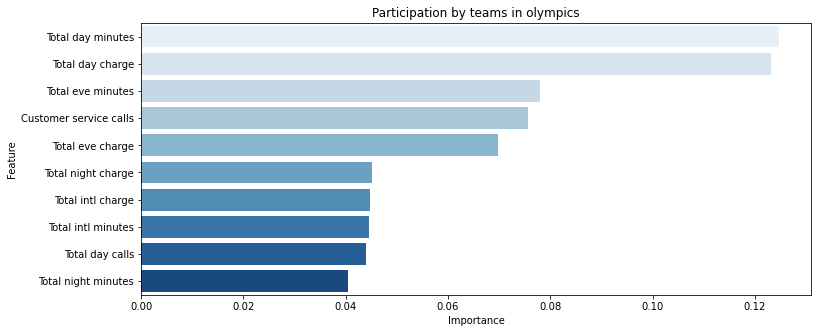

In [14]:
sns.set_palette("Blues",10)
plt.figure(figsize=(12,5))
plt.title("Participation by teams in olympics")
sns.barplot(x='Importance',y='Feature',data=feature_importance_df.head(top_n));

In [15]:
# Select the top N features for your model
selected_features = feature_importance_df['Feature'].head(top_n).tolist()

scaler = StandardScaler()
# Subset your training and testing data to include only the selected features
X_train_selected = scaler.fit_transform(X_train[selected_features])
X_test_selected = scaler.transform(X_test[selected_features])

### 4. Random Forest Algorithm

In [16]:
rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(X_train_selected, y_train)
y_pred = rfc.predict(X_test_selected)

In [17]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### 5. Cross Validation using GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [4, 8, 16, 32, None],
}
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train_selected, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 16, 'n_estimators': 250}

0.865 (+/-0.019) for {'max_depth': 4, 'n_estimators': 5}
0.872 (+/-0.019) for {'max_depth': 4, 'n_estimators': 50}
0.869 (+/-0.032) for {'max_depth': 4, 'n_estimators': 250}
0.869 (+/-0.029) for {'max_depth': 4, 'n_estimators': 500}
0.85 (+/-0.042) for {'max_depth': 8, 'n_estimators': 5}
0.88 (+/-0.037) for {'max_depth': 8, 'n_estimators': 50}
0.88 (+/-0.037) for {'max_depth': 8, 'n_estimators': 250}
0.882 (+/-0.043) for {'max_depth': 8, 'n_estimators': 500}
0.865 (+/-0.056) for {'max_depth': 16, 'n_estimators': 5}
0.874 (+/-0.02) for {'max_depth': 16, 'n_estimators': 50}
0.885 (+/-0.042) for {'max_depth': 16, 'n_estimators': 250}
0.88 (+/-0.028) for {'max_depth': 16, 'n_estimators': 500}
0.861 (+/-0.061) for {'max_depth': 32, 'n_estimators': 5}
0.882 (+/-0.031) for {'max_depth': 32, 'n_estimators': 50}
0.88 (+/-0.037) for {'max_depth': 32, 'n_estimators': 250}
0.882 (+/-0.033) for {'max_depth': 32, 'n_estimators': 500}
0.861 (+/-0.0

In [20]:
cv.best_estimator_

RandomForestClassifier(max_depth=16, n_estimators=250)

In [21]:
joblib.dump(cv.best_estimator_, 'C:/Users/Prath/OneDrive/Desktop/RF.pkl')

['C:/Users/Prath/OneDrive/Desktop/RF.pkl']

In [22]:
RF = joblib.load('C:/Users/Prath/OneDrive/Desktop/RF.pkl')

In [23]:
def evaluate_model(model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(str(model).split('(')[0],
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [24]:
evaluate_model(RF, X_test_selected, y_test)

RandomForestClassifier -- Accuracy: 0.94 / Precision: 0.818 / Recall: 0.6 / Latency: 22.6ms


### Conclusion

- We analyzed the Telecom churn data using Random Forest algorithm by fine tuning different hyper parameters.
- We first cleaned the dataset and then took into consideration the most important features for building the model.
- We then used Random Forest Classifier for building our model
- We used GridSearchCV for cross validation and tuned some of the hyper parameters like n_estimators and max_depth
- We finally compared accuracy and recall and chose the best model with n_estimators=250 and max_depth=None
- Our model has accuracy of 92.5% and Precision of 69.2%